In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import sawtooth
from scipy.integrate import quad
from math import*

در این تمرین باید با استفاده از ضرایب فوریه، یک سیگنال را سنتز کنیم. برای این کار از کتابخانه scipy و ابزار هایی که در اختیارمان قرار داده است استفاده میکنیم.


در این تمرین، سنتز سیگنال دندان اره ای را انجام میدهیم که دوره تناوب آن را هم $2\pi$
در نظر گرفته ایم. 

ضرایب فوریه را میتوانیم با فرمول های زیر محاسبه کنیم.


\begin{gather*}
a_0 = \frac{1}{T} \int_{0}^{T} x(t)dt\\
a_n = \frac{2}{T} \int_{0}^{T} x(t)cos(n\omega_0 t)dt\\
b_n = \frac{2}{T} \int_{0}^{T} x(t)sin(n\omega_0 t)dt
\end{gather*}

و بعد از محاسبه ضرایب، میتوان تخمین فوریه را به صورت زیر محاسبه کرد

\begin{gather*}
f(x) = \frac{a_0}{2} + \sum_{n=1}^{\infty} a_n cos(n\omega t) + \sum_{n=1}^{\infty} b_n sin(n\omega t)
\end{gather*}

تابع زیر، ضرایب فوریه را با انتگرال گیری به دست آورده (فرمول برای دوره تناوب $2\pi$ ساده سازی شده است)
و در نهایت با محاسبه تابع 
$f(x)$
، مقدار تخمینی فوریه را بازمیگرداند

زمانی که $n$ برابر با صفر باشد، 
در فرمول 
$a_n$
مقدار 
$cos$
برابر با $1$
میشود و درنتیجه 
$2a_0$
تولید میشود. بنابراین در فرمول تخمین فوریه میتوانیم از مقادیر تولیدی 
$a_n$
استفاده کنیم و 
$a_0$
را جداگانه محاسبه نکنیم

In [ ]:
def synthesis(input,output,n,periodic_func):
    cosine_part_func = lambda input:periodic_func(input)*cos(i*input)  #i :dummy index
    sin_part_func = lambda input:periodic_func(input)*sin(i*input)

    An=[]
    Bn=[]
    sum=0

    # calculate an and bn 
    
    for i in range(0, n):
        an=quad(cosine_part_func,-np.pi,np.pi)[0]*(1.0/np.pi)
        An.append(an)

        bn=quad(sin_part_func,-np.pi,np.pi)[0]*(1.0/np.pi)
        Bn.append(bn) 

    # add a_0
    sum = sum + An[0] / 4
    #synthesis signal using an and bn
    for i in range(1, n):
        sum = sum + (An[i]*np.cos(i*input) + Bn[i]*np.sin(i*input))
    
    # add a_0 part
    return sum    

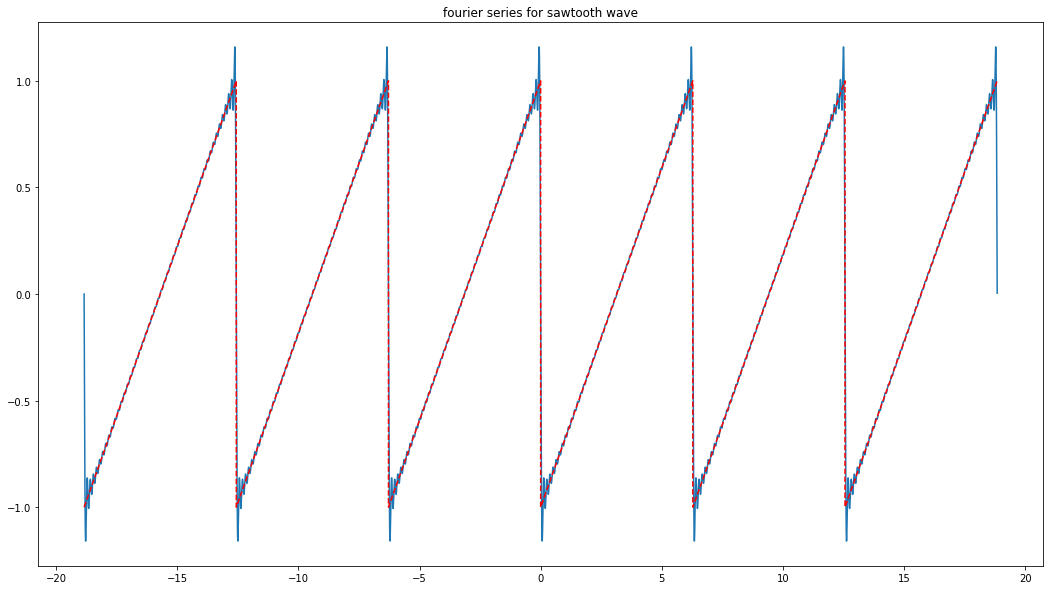

In [ ]:
input=np.arange(-6*np.pi,6*np.pi,0.001) 
output=sawtooth(input)
n=50
sum=synthesis(input,output,n,sawtooth)

plt.figure(figsize=(18,10))
plt.plot(input,sum)
plt.plot(input,output,'r--')
plt.title("fourier series for sawtooth wave")
plt.show()

مشاهده میکنیم که با استفاده از ضرایب فوریه و تخمین آن، توانستیم سیگنال دندان اره ای را سنتز کنیم